In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
data = pd.read_csv('groceries.csv', sep='\t', header=None)

In [3]:
data.shape

(9835, 1)

In [4]:
data.rename(columns={0: 'Items'}, inplace = True)

In [5]:
data.head()

,Items
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


In [6]:
type(data['Items'][0])

str

In [7]:
data['Items'] = data['Items'].apply(lambda row: row.split(','))

In [8]:
data['Items_length'] = data['Items'].apply(len)

In [9]:
data['Items_length'].value_counts()

1     2159
2     1643
3     1299
4     1005
5      855
6      645
7      545
8      438
9      350
10     246
11     182
12     117
13      78
14      77
15      55
16      46
17      29
19      14
18      14
21      11
20       9
23       6
22       4
29       3
26       1
28       1
32       1
24       1
27       1
Name: Items_length, dtype: int64

In [10]:
data.head()

,Items,Items_length
0,"[citrus fruit, semi-finished bread, margarine,...",4
1,"[tropical fruit, yogurt, coffee]",3
2,[whole milk],1
3,"[pip fruit, yogurt, cream cheese, meat spreads]",4
4,"[other vegetables, whole milk, condensed milk,...",4


In [11]:
data['Items'][0]

['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups']

In [12]:
filter_data = [x for x in data['Items'] if len(x)>=2]

In [13]:
len(filter_data)

7676

In [14]:
data.drop(['Items_length'], inplace = True, axis =1 )

In [15]:
temp_df = data.explode('Items')

In [16]:
temp_df['Items'].value_counts()

whole milk               2513
other vegetables         1903
rolls/buns               1809
soda                     1715
yogurt                   1372
                         ... 
kitchen utensil             4
bags                        4
preservation products       2
baby food                   1
sound storage medium        1
Name: Items, Length: 169, dtype: int64

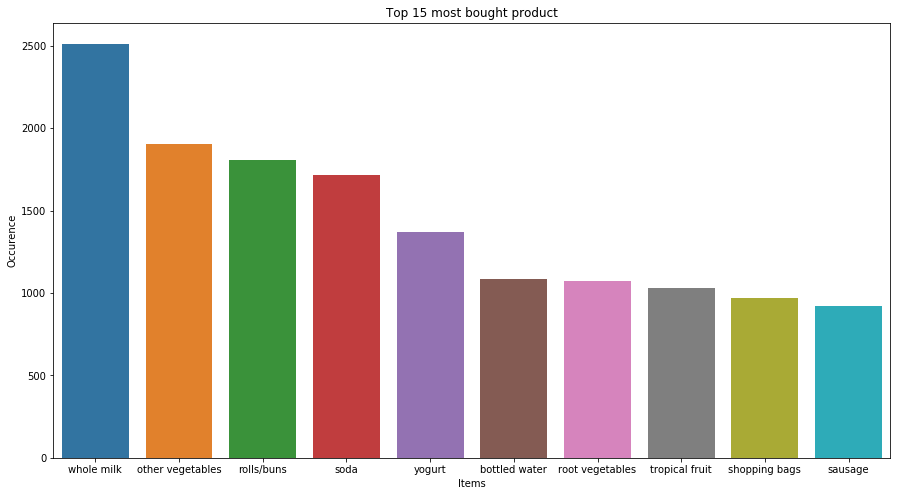

In [17]:
plt.figure(figsize=(15,8))
plt.title('Top 15 most bought product')
plot = sns.barplot(x=temp_df['Items'].value_counts().head(10).index, y=temp_df['Items'].value_counts().head(10))
plt.xlabel('Items')
plt.ylabel('Occurence')
plt.savefig('top_15_prod.png')

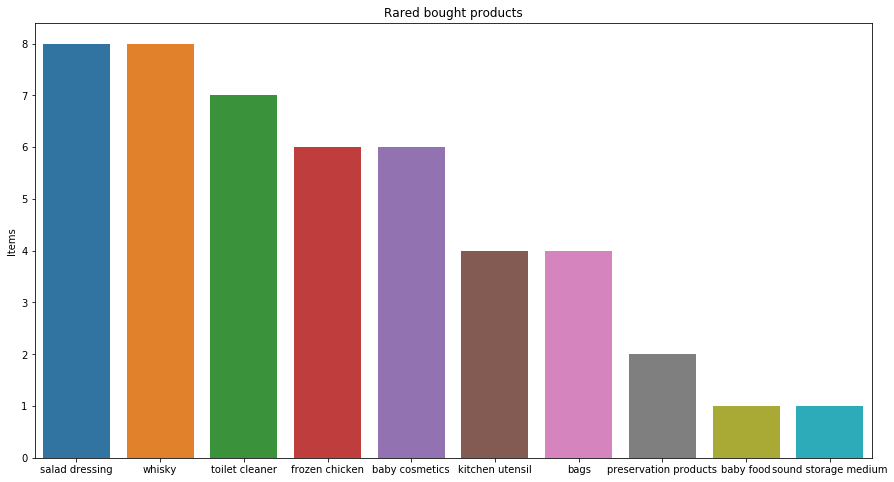

In [18]:
plt.figure(figsize=(15,8))
plt.title('Rared bought products')
sns.barplot(x=temp_df['Items'].value_counts().tail(10).index, y=temp_df['Items'].value_counts().tail(10))

In [19]:
# One-hot encode data in pandas dataframe
te = TransactionEncoder()
te_ary = te.fit(filter_data).transform(filter_data)

In [20]:
transaction_group = pd.DataFrame(te_ary, columns=te.columns_)
transaction_group.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


In [21]:
freq_itemsets = apriori(transaction_group, min_support=0.01, use_colnames=True, max_len = 2)
freq_itemsets['length'] = freq_itemsets['itemsets'].apply(lambda x : len(x))

In [22]:
freq_itemsets

,support,itemsets,length
0,0.041558,(UHT-milk),1
1,0.022277,(baking powder),1
2,0.063835,(beef),1
3,0.041298,(berries),1
4,0.029964,(beverages),1
...,...,...,...
410,0.041298,"(whole milk, whipped/sour cream)",2
411,0.026576,"(yogurt, whipped/sour cream)",2
412,0.021886,"(whole milk, white bread)",2
413,0.011595,"(yogurt, white bread)",2


In [23]:
rules = association_rules(freq_itemsets, metric="lift", min_threshold = 1)

In [24]:
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'leverage', 'conviction']].head()

,antecedents,consequents,support,confidence,lift,leverage,conviction
0,(other vegetables),(UHT-milk),0.010422,0.043455,1.045636,0.000455,1.001983
1,(UHT-milk),(other vegetables),0.010422,0.250784,1.045636,0.000455,1.014609
2,(baking powder),(whole milk),0.011855,0.532164,1.707729,0.004913,1.471411
3,(whole milk),(baking powder),0.011855,0.038043,1.707729,0.004913,1.016390
4,(beef),(citrus fruit),0.010813,0.169388,1.629349,0.004177,1.078770
